In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

In [2]:
dt = pd.read_csv(r"globalterrorismdb_0718dist.csv",encoding='latin1')
dt.head()


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [3]:
dt.columns.values

array(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region', 'region_txt',
       'provstate', 'city', 'latitude', 'longitude', 'specificity',
       'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'alternative', 'alternative_txt', 'multiple',
       'success', 'suicide', 'attacktype1', 'attacktype1_txt',
       'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt',
       'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt',
       'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2',
       'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2',
       'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt',
       'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3',
       'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2',
       'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2',
       'guncertain3', 'in

In [5]:
dt.rename(columns={'eventid':'Event_ID','iyear':'Year','imonth':'Month','iday':'Day','region_txt':'Region','country_txt':'Country','provstate':'State',
                    'city':'City','latitude':'latitude','longitude':'longitude','attacktype1_txt':'AttackType','nkill':'kill',
                     'nwound':'wound','targtype1_txt':'target1','weaptype1_txt':'Weapon','summary':'Summary','gname':'Group'},inplace=True)

In [13]:
dt = dt[['Year','Month','Day','Country','Region','State','City','latitude','longitude','AttackType','kill','wound','target1','Weapon','Group','motive','Summary']]

In [14]:
dt.head()

,Year,Month,Day,Country,Region,State,City,latitude,longitude,AttackType,kill,wound,target1,target1,Weapon,Group,motive,Summary
0,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Private Citizens & Property,Julio Guzman,Unknown,MANO-D,NaN,NaN
1,1970,0,0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,Government (Diplomatic),"Nadine Chaval, daughter",Unknown,23rd of September Communist League,NaN,NaN
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Journalists & Media,Employee,Unknown,Unknown,NaN,NaN
3,1970,1,0,Greece,Western Europe,Attica,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,Government (Diplomatic),U.S. Embassy,Explosives,Unknown,NaN,NaN
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,Government (Diplomatic),U.S. Consulate,Incendiary,Unknown,NaN,NaN


In [15]:
dt.shape

(181691, 18)

In [16]:
dt.isnull().sum()


Year               0
Month              0
Day                0
Country            0
Region             0
State            421
City             434
latitude        4556
longitude       4557
AttackType         0
kill           10313
wound          16311
target1            0
target1          636
Weapon             0
Group              0
motive        131130
Summary        66129
dtype: int64

In [17]:
dt['wound']=dt['wound'].fillna(0)
dt['kill']=dt['kill'].fillna(0)

In [18]:
dt['Casualitites']=dt['wound']+dt['kill']

In [19]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 19 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Year          181691 non-null  int64  
 1   Month         181691 non-null  int64  
 2   Day           181691 non-null  int64  
 3   Country       181691 non-null  object 
 4   Region        181691 non-null  object 
 5   State         181270 non-null  object 
 6   City          181257 non-null  object 
 7   latitude      177135 non-null  float64
 8   longitude     177134 non-null  float64
 9   AttackType    181691 non-null  object 
 10  kill          181691 non-null  float64
 11  wound         181691 non-null  float64
 12  target1       181691 non-null  object 
 13  target1       181055 non-null  object 
 14  Weapon        181691 non-null  object 
 15  Group         181691 non-null  object 
 16  motive        50561 non-null   object 
 17  Summary       115562 non-null  object 
 18  Casu

In [20]:
dt.describe()

,Year,Month,Day,latitude,longitude,kill,wound,Casualitites
count,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181691.000000,181691.000000,181691.000000
mean,2002.638997,6.467277,15.505644,23.498343,-4.586957e+02,2.266860,2.883296,5.150156
std,13.259430,3.388303,8.814045,18.569242,2.047790e+05,11.227057,34.309747,40.555416
min,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,11.510046,4.545640e+00,0.000000,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,31.467463,4.324651e+01,0.000000,0.000000,1.000000
75%,2014.000000,9.000000,23.000000,34.685087,6.871033e+01,2.000000,2.000000,4.000000
max,2017.000000,12.000000,31.000000,74.633553,1.793667e+02,1570.000000,8191.000000,9574.000000


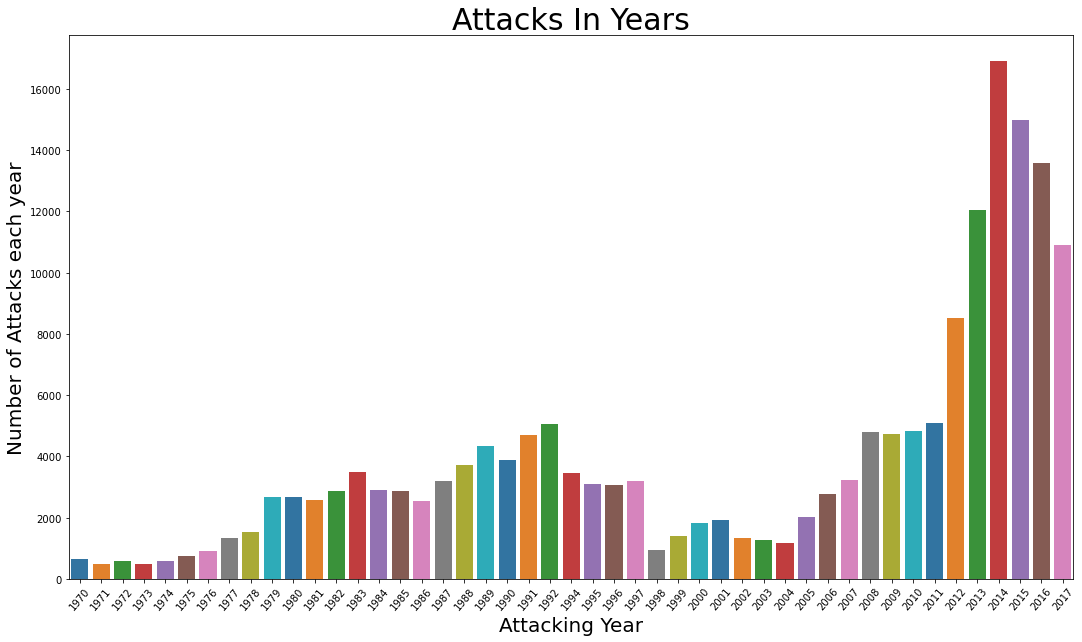

In [29]:
yr=dt['Year'].unique()
years_count=dt['Year'].value_counts(dropna=False).sort_index()
plt.figure(figsize=(18,10))
sns.barplot(x=yr,y=years_count,palette="tab10")
plt.xticks(rotation=50)
plt.xlabel('Attacking Year',fontsize=20,color='black')
plt.yticks(rotation=0)
plt.ylabel('Number of Attacks each year',fontsize=20,color='black')
plt.title('Attacks In Years',fontsize=30,color='black')
plt.show()

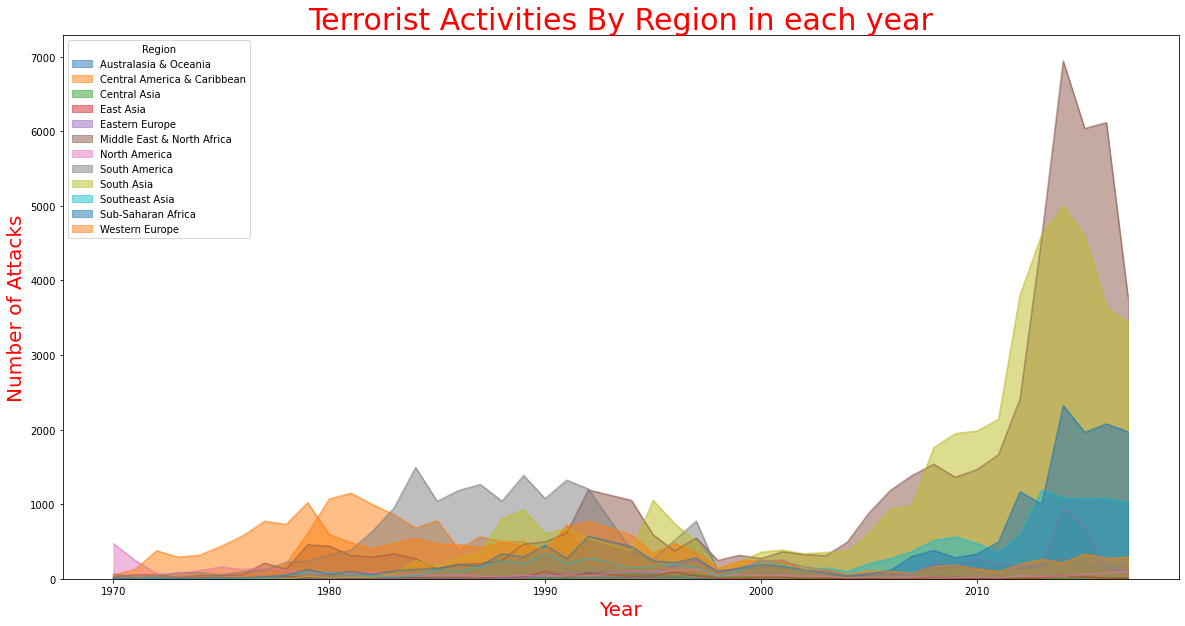

In [22]:
pd.crosstab(dt.Year,dt.Region).plot(kind='area',stacked=False,figsize=(20,10))
plt.title('Terrorist Activities By Region in each year',fontsize = 30,color='red')
plt.ylabel('Number of Attacks',fontsize=20,color='red')
plt.xlabel('Year',fontsize=20,color='red')
plt.show()

In [23]:
Attacks=dt.Region.value_counts()[:10]
Attacks


Middle East & North Africa     50474
South Asia                     44974
South America                  18978
Sub-Saharan Africa             17550
Western Europe                 16639
Southeast Asia                 12485
Central America & Caribbean    10344
Eastern Europe                  5144
North America                   3456
East Asia                        802
Name: Region, dtype: int64

In [24]:
Attacks=dt.Country.value_counts()[:10]
Attacks

Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Name: Country, dtype: int64

In [25]:
dt.Group.value_counts()[1:10]

Taliban                                             7478
Islamic State of Iraq and the Levant (ISIL)         5613
Shining Path (SL)                                   4555
Farabundo Marti National Liberation Front (FMLN)    3351
Al-Shabaab                                          3288
New People's Army (NPA)                             2772
Irish Republican Army (IRA)                         2671
Revolutionary Armed Forces of Colombia (FARC)       2487
Boko Haram                                          2418
Name: Group, dtype: int64

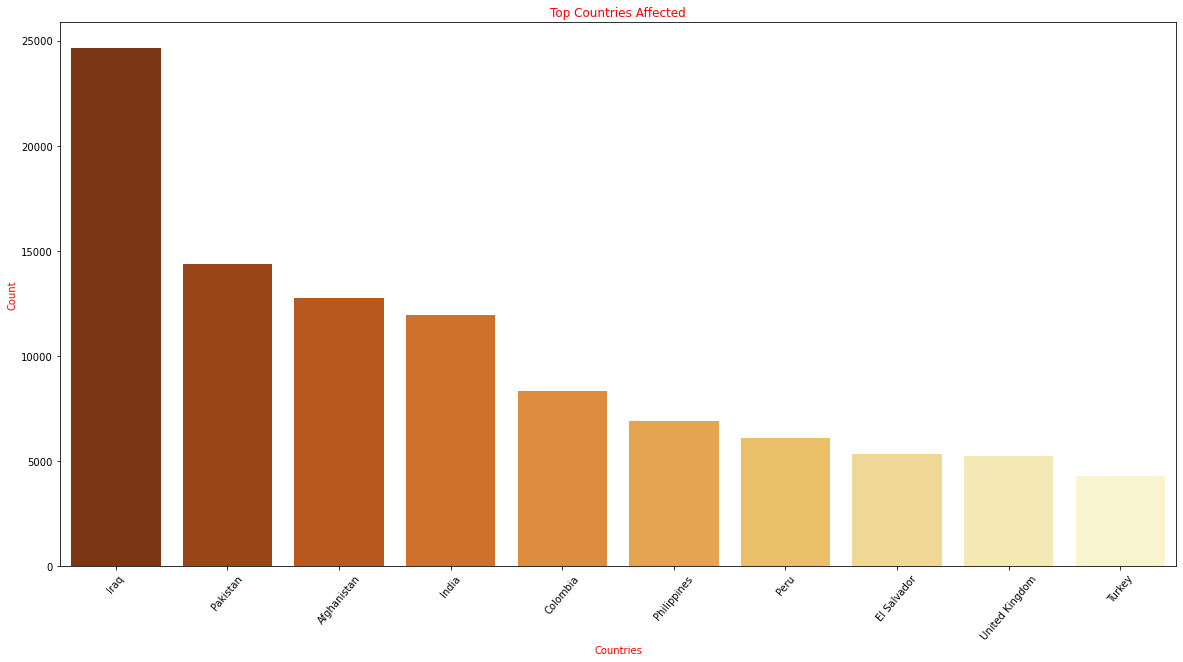

In [26]:
plt.subplots(figsize=(20,10))
sns.barplot(dt['Country'].value_counts()[:10].index,dt['Country'].value_counts()[:10].values,palette='YlOrBr_r')
plt.title('Top Countries Affected',color='red')
plt.xlabel('Countries',color='red')
plt.ylabel('Count',color='red')
plt.xticks(rotation=50)
plt.show()


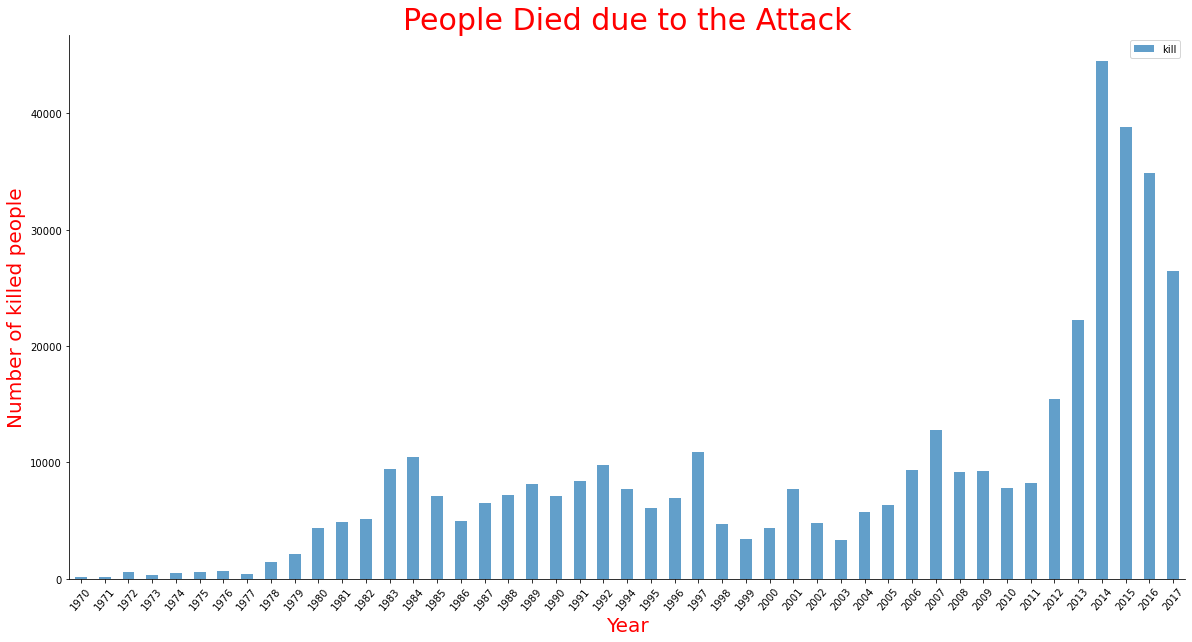

In [27]:
df = dt[['Year','kill']].groupby(['Year']).sum()
fig, ax4 = plt.subplots(figsize=(20,10))
df.plot(kind = 'bar',alpha=0.7,ax=ax4)
plt.xticks(rotation = 50)
plt.title('People Died due to the Attack',fontsize=30,color='red')
plt.ylabel('Number of killed people',fontsize=20,color='red')
plt.xlabel('Year',fontsize=20,color='red')
top_side = ax4.spines['top']
top_side.set_visible(False)
right_side = ax4.spines['right']
right_side.set_visible(False)

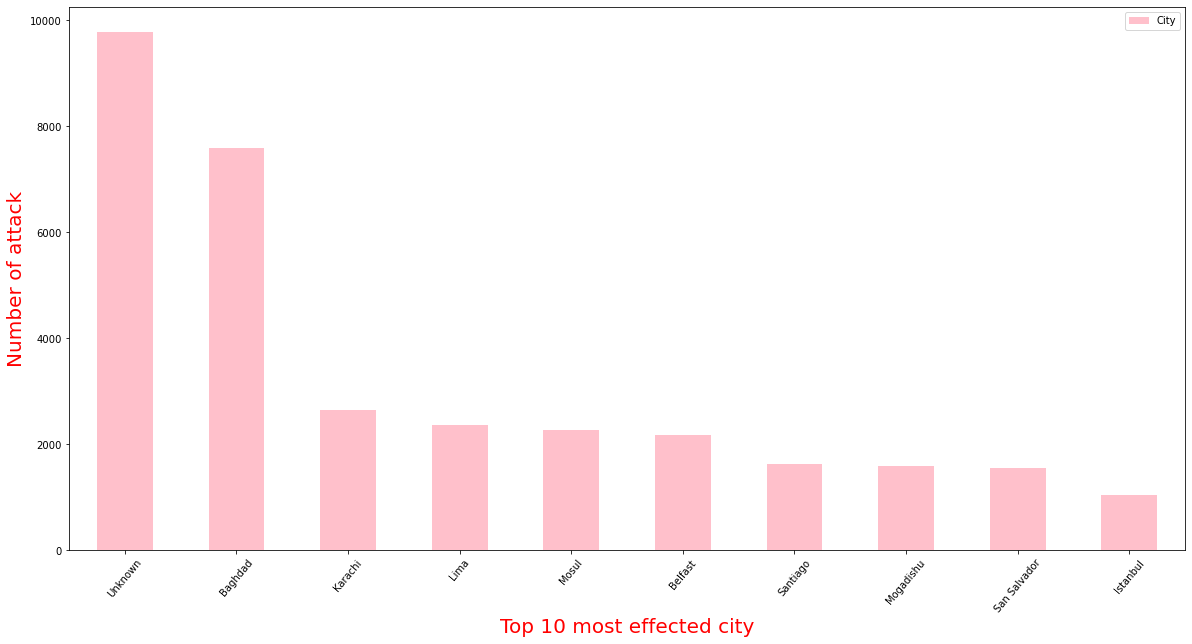

In [28]:
dt['City'].value_counts().to_frame().sort_values('City',axis=0,ascending=False).head(10).plot(kind='bar',figsize=(20,10),color='pink')
plt.xticks(rotation=50)
plt.xlabel('City',fontsize=30,color='red')
plt.ylabel('Number of attack',fontsize=20,color='red')
plt.xlabel('Top 10 most effected city',fontsize=20,color='red')
plt.show()


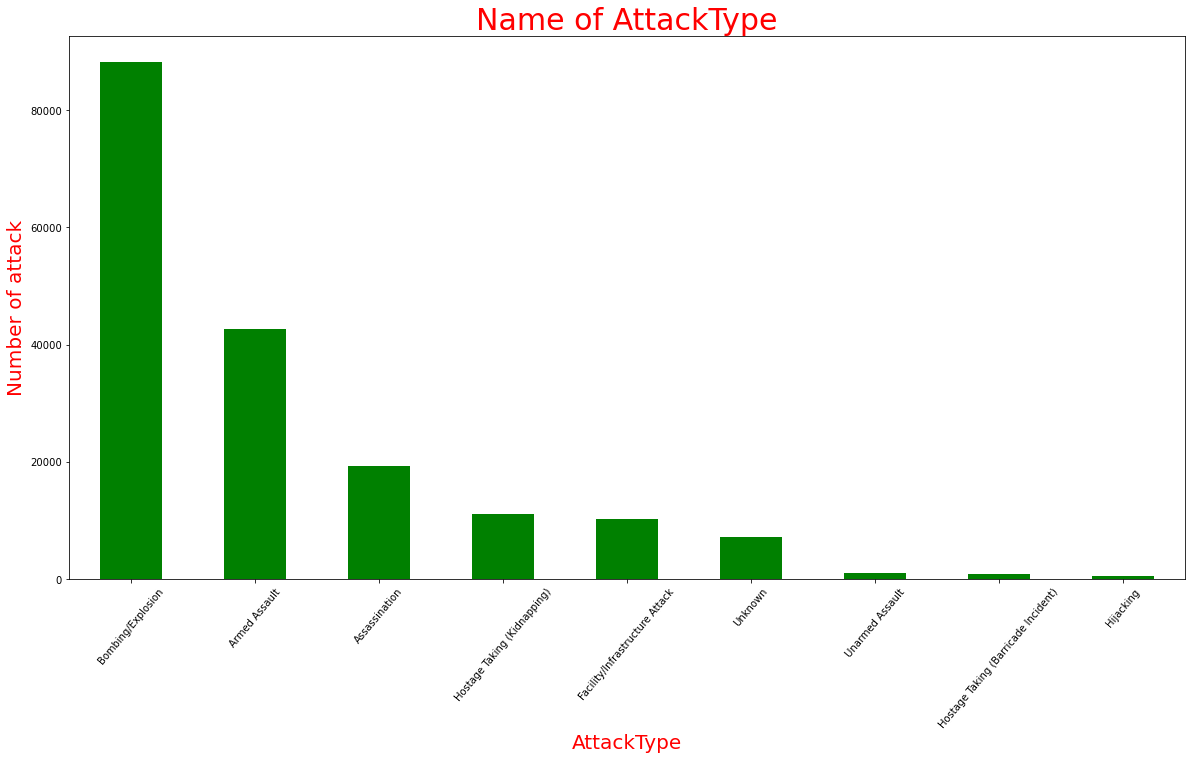

In [30]:
dt['AttackType'].value_counts().plot(kind = 'bar',figsize = (20,10),color = 'green')
plt.xticks(rotation = 50)
plt.ylabel('Number of attack',fontsize=20,color='red')
plt.xlabel('AttackType',fontsize=20,color='red')
plt.title('Name of AttackType',fontsize=30,color='red')
plt.show()

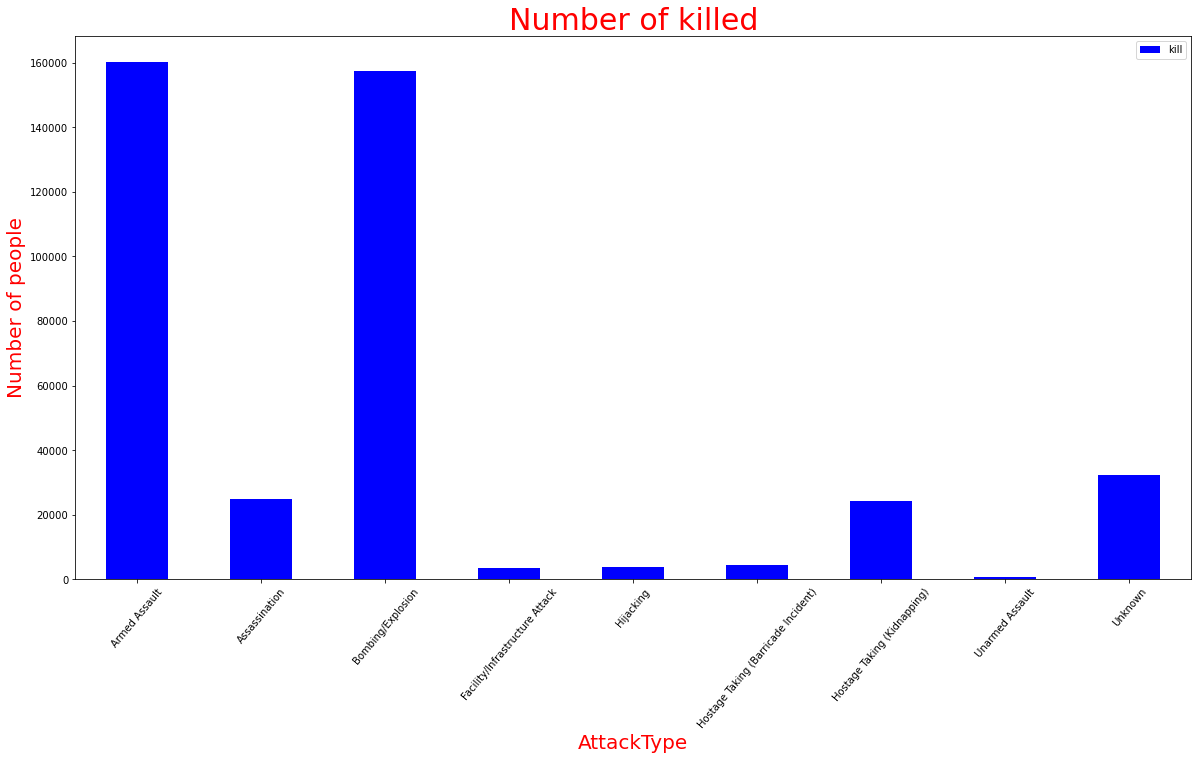

In [31]:
dt[['AttackType','kill']].groupby(['AttackType'],axis=0).sum().plot(kind='bar',figsize=(20,10),color=['blue'])
plt.xticks(rotation=50)
plt.xlabel('AttackType',fontsize=20,color='red')
plt.ylabel('Number of people',fontsize=20,color='red')
plt.title('Number of killed',fontsize=30,color='red')
plt.show()

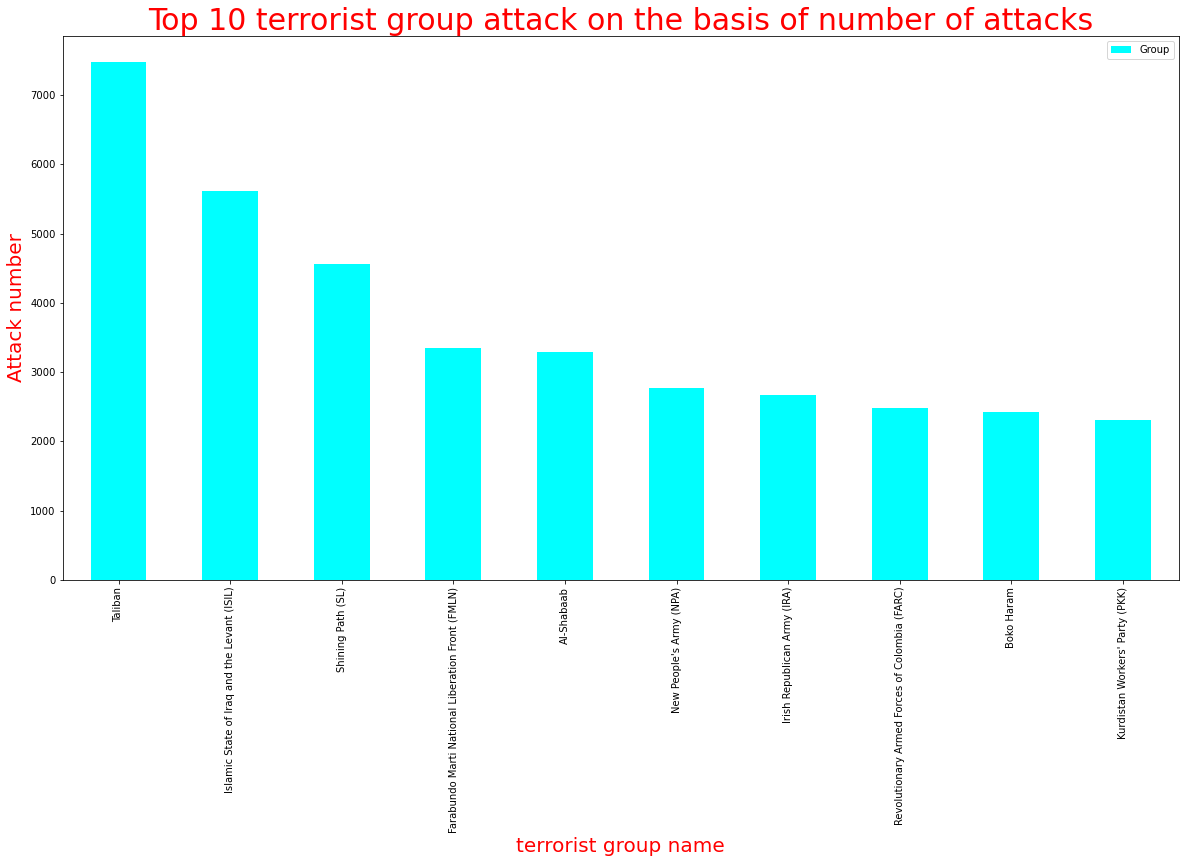

In [32]:
dt['Group'].value_counts().to_frame().drop('Unknown').head(10).plot(kind='bar',color = 'cyan',figsize=(20,10))
plt.title('Top 10 terrorist group attack on the basis of number of attacks',fontsize=30,color='red')
plt.xlabel('terrorist group name',fontsize=20,color='red')
plt.ylabel('Attack number',fontsize=20,color='red')
plt.show()

In [34]:
dfn=dt[['Group','Country','kill']]
dfn=dfn.groupby(['Group','Country'],axis=0).sum().sort_values('kill',ascending=False).drop('Unknown').reset_index().head(10)
dfn


,Group,Country,kill
0,Islamic State of Iraq and the Levant (ISIL),Iraq,31058.0
1,Taliban,Afghanistan,29269.0
2,Boko Haram,Nigeria,16917.0
3,Shining Path (SL),Peru,11595.0
4,Liberation Tigers of Tamil Eelam (LTTE),Sri Lanka,10928.0
5,Al-Shabaab,Somalia,8176.0
6,Farabundo Marti National Liberation Front (FMLN),El Salvador,8019.0
7,Islamic State of Iraq and the Levant (ISIL),Syria,6883.0
8,Nicaraguan Democratic Force (FDN),Nicaragua,6630.0
9,Tehrik-i-Taliban Pakistan (TTP),Pakistan,6014.0


In [35]:
kills=dt.loc[:,'kill']
print('Number of people killed by terror attack:',int(sum(kills.dropna())))

Number of people killed by terror attack: 411868


In [36]:
type_of_Kill=dt.pivot_table(columns='AttackType',values='kill',aggfunc=sum)
type_of_Kill


AttackType,Armed Assault,Assassination,Bombing/Explosion,Facility/Infrastructure Attack,Hijacking,Hostage Taking (Barricade Incident),Hostage Taking (Kidnapping),Unarmed Assault,Unknown
kill,160297.0,24920.0,157321.0,3642.0,3718.0,4478.0,24231.0,880.0,32381.0


In [37]:
country_of_Kill=dt.pivot_table(columns='Country',values='kill',aggfunc=sum)
country_of_Kill

Country,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,Vietnam,Wallis and Futuna,West Bank and Gaza Strip,West Germany (FRG),Western Sahara,Yemen,Yugoslavia,Zaire,Zambia,Zimbabwe
kill,39384.0,42.0,11066.0,0.0,3043.0,0.0,490.0,37.0,23.0,30.0,...,1.0,0.0,1500.0,97.0,1.0,8776.0,119.0,324.0,70.0,154.0
